In [1]:
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
from typing import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.special import kolmogorov

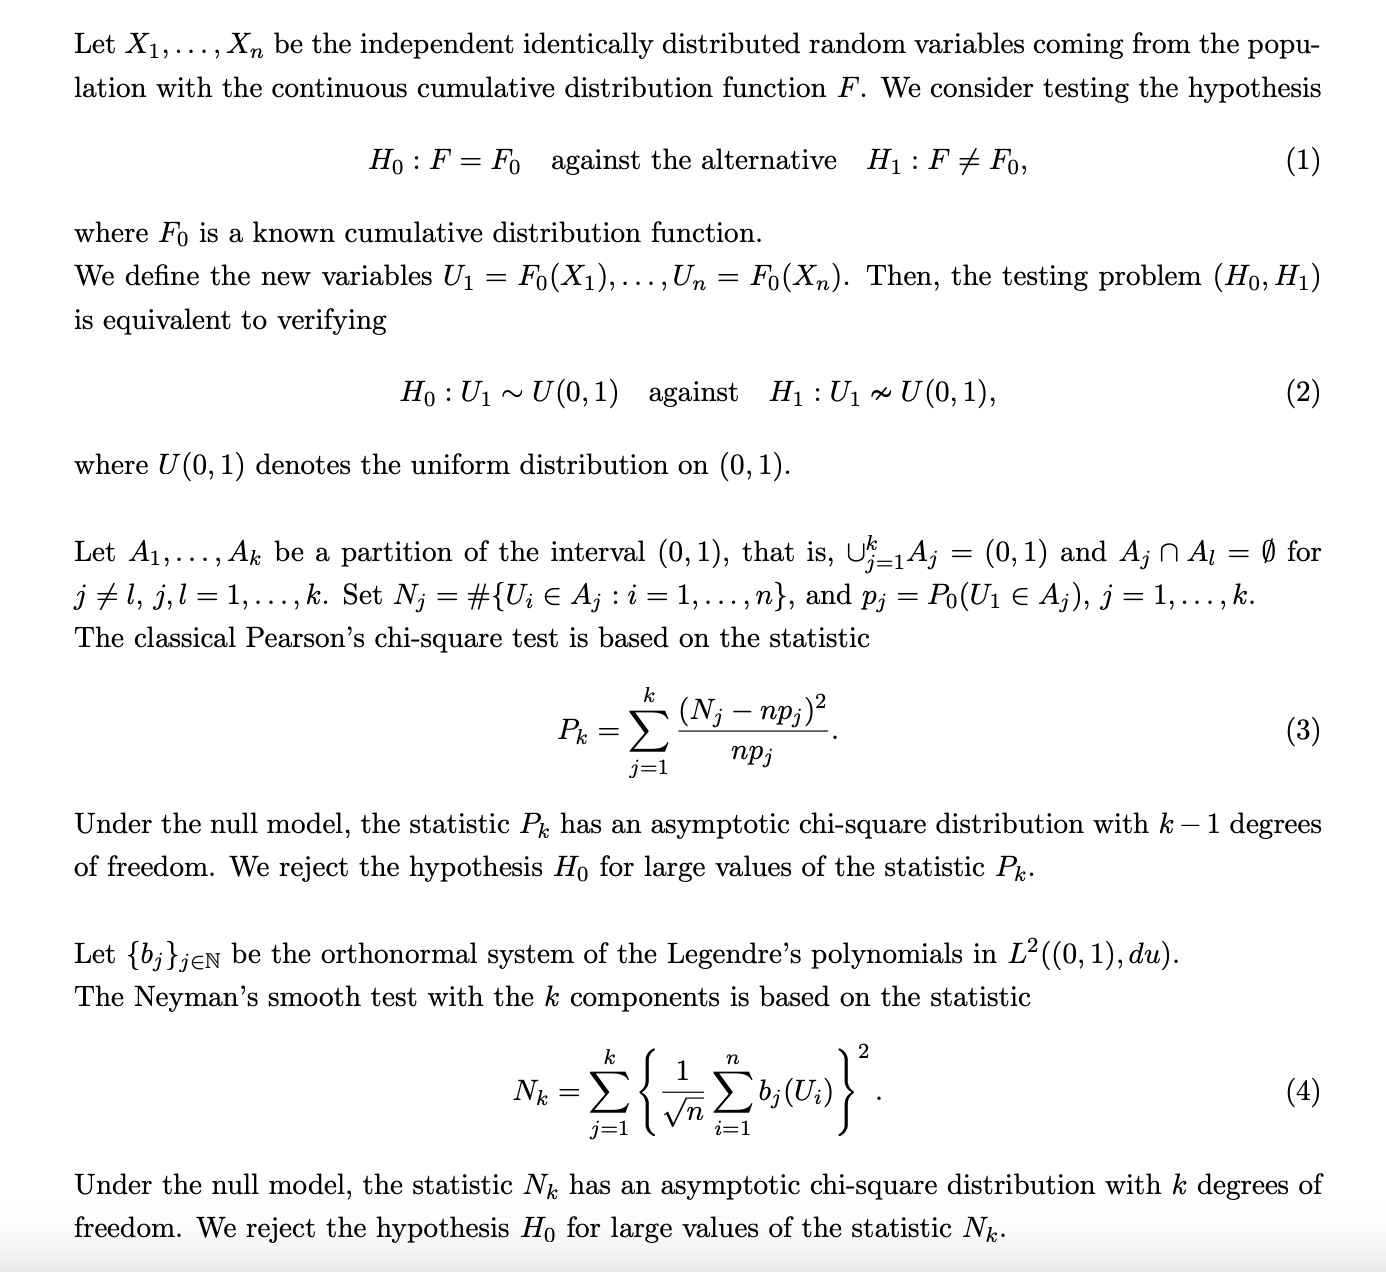

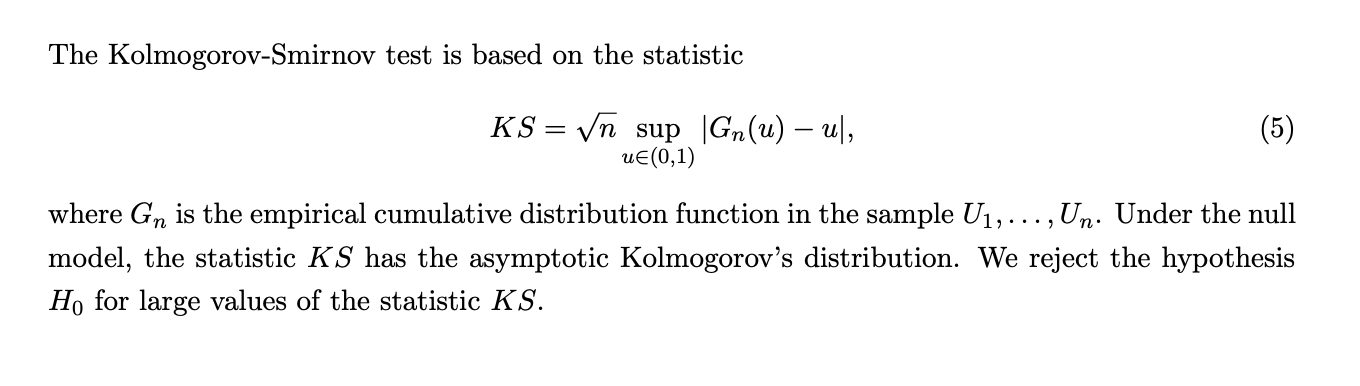

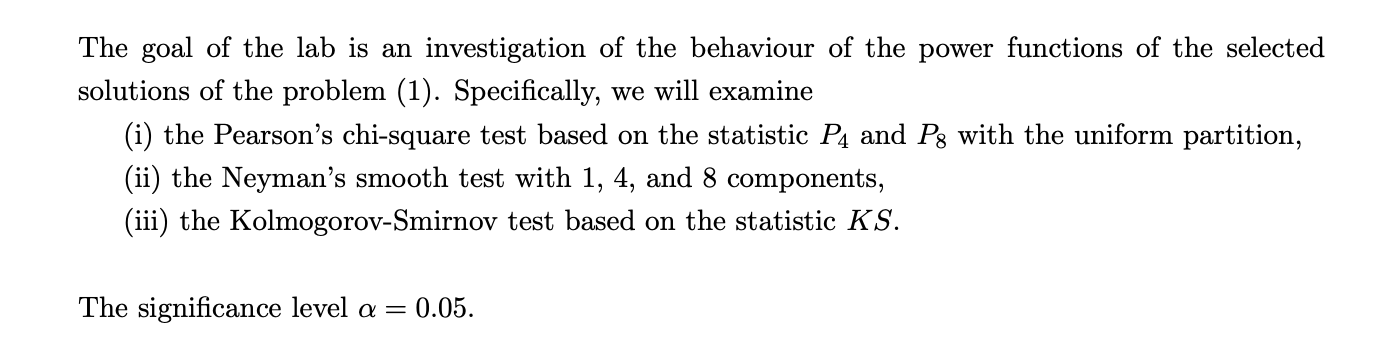

In [2]:
def pearson(k: int, X: np.ndarray) -> float:
    hist, bins = np.histogram(X, bins=k)
    N = len(X)
    p = 1 / k
    return np.sum((hist - N * p) ** 2 / (N * p))

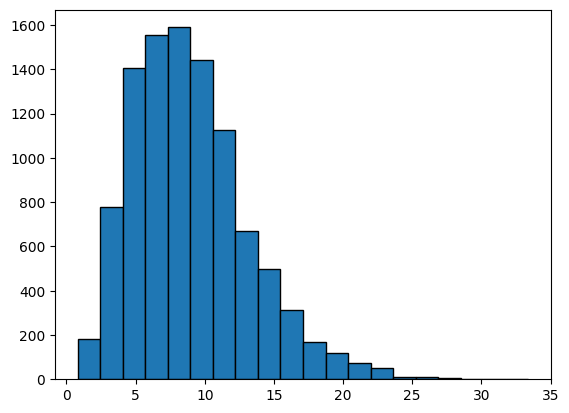

In [3]:
data = []
k = 10
for i in range(10000):
    data.append(pearson(
        k=k,
        X=np.random.uniform(0, 1, size=100)
    ))
_ = plt.hist(data, bins=20, edgecolor="black")

In [4]:
polynomials = [
    np.poly1d([1]),
    np.poly1d([3.464102, -1.732051]),
    np.poly1d([13.41641, -13.41641, 2.236068]),
    np.poly1d([52.91503, -79.37254, 31.74902, -2.645751]),
    np.poly1d([210, -420, 270, -60, 3]),
    np.poly1d([835.7894, -2089.474, 1857.31, -696.4912, 99.49874, -3.316625]),
    np.poly1d([3331.529, -9994.588, 11357.49, -6057.326, 1514.332, -151.4332,  3.605551]),
    np.poly1d([13292.08, -46522.28, 64415.46, -44732.96, 16266.53, -2927.975, 216.8871, -3.872983]),
    np.poly1d([53064.37, -212257.5, 346687.2, -297160.5, 142865.6, -38097.5, 5195.113, -296.8636, 4.123106]),
]

In [9]:
def neyman(k: int, X: np.ndarray) -> float:
    N = len(X)
    ans: float = 0
    for j in range(k):
        inner_sum: float = 0
        for i in range(N):
            # inner_sum += scipy.special.eval_sh_legendre(j + 1, X[i])
            inner_sum += polynomials[j + 1](X[i])
        ans += (inner_sum / np.sqrt(N)) ** 2
    return ans

100%|██████████| 1000/1000 [00:05<00:00, 193.01it/s]


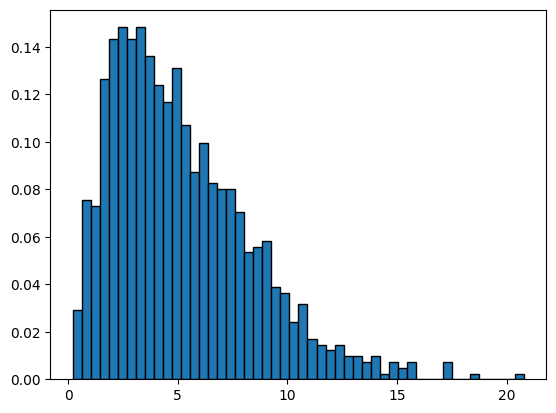

In [10]:
data = []
k = 5
for i in tqdm(range(1000)):
    data.append(neyman(
        k=k,
        X=np.random.uniform(0, 1, size=100)
    ))
_ = plt.hist(data, bins=50, edgecolor="black", density=True)

In [11]:
def ks(X: np.ndarray) -> float:
    N = len(X)
    return np.sqrt(N) * scipy.stats.kstest(rvs=X, cdf="uniform").statistic

100%|██████████| 10000/10000 [00:14<00:00, 703.23it/s]


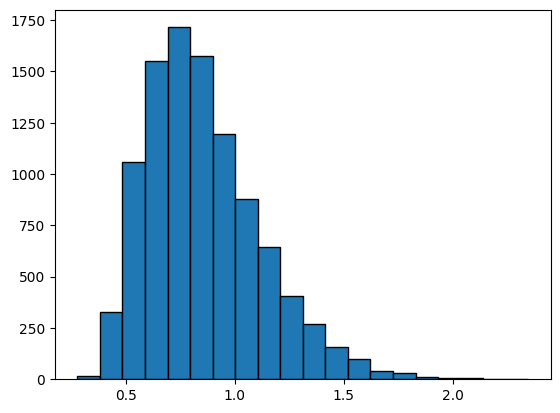

In [12]:
data = []
k = 5
for i in tqdm(range(10000)):
    data.append(ks(
        X=np.random.uniform(0, 1, size=100)
    ))
_ = plt.hist(data, bins=20, edgecolor="black")

In [13]:
def chi_critical_value(df: int, sig: float) -> float:
    return scipy.stats.chi2.ppf(sig, df=df)

## Task 1

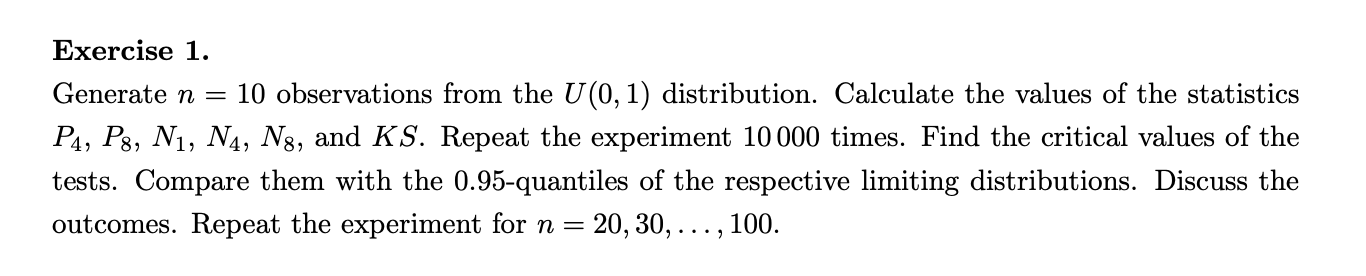

In [14]:
N=10

In [15]:
p4s, p8s, n1s, n4s, n8s, kes = [], [], [], [], [], []
for _ in tqdm(range(10000)):
    X = np.random.uniform(0, 1, size=N)
    p4 = pearson(k=4, X=X)
    p8 = pearson(k=8, X=X)
    n1 = neyman(k=1, X=X)
    n4 = neyman(k=4, X=X)
    n8 = neyman(k=8, X=X)
    k = ks(X=X)
    p4s.append(p4)
    p8s.append(p8)
    n1s.append(n1)
    n4s.append(n4)
    n8s.append(n8)
    kes.append(k)

100%|██████████| 10000/10000 [00:22<00:00, 444.73it/s]


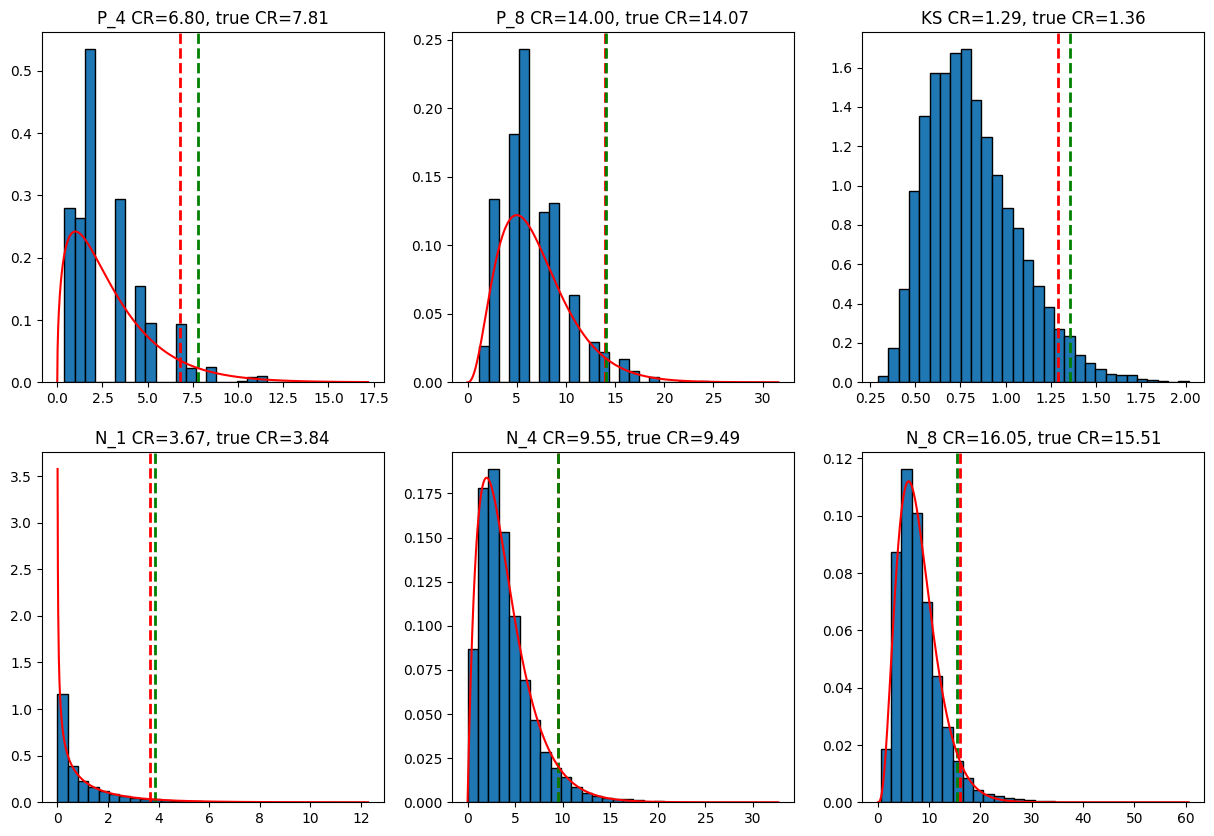

In [20]:
bins = 30
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

_ = axes[0][0].hist(p4s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(p4s, 0.95)
true_cr = chi_critical_value(df=3, sig=0.95)
axes[0][0].set_title(f"P_4 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[0][0].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[0][0].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[0][0].plot(
    np.linspace(0, max(p4s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(p4s), 1000), df=3),
    color="red"
)


_ = axes[0][1].hist(p8s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(p8s, 0.95)
true_cr = chi_critical_value(df=7, sig=0.95)
axes[0][1].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[0][1].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[0][1].set_title(f"P_8 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[0][1].plot(
    np.linspace(0, max(p8s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(p8s), 1000), df=7),
    color="red"
)

_ = axes[0][2].hist(kes, bins=bins, edgecolor="black", density=True)
cr = np.quantile(kes, 0.95)
true_cr = scipy.stats.kstwobign.ppf(0.95)
axes[0][2].set_title(f"KS CR={cr:.2f}, true CR={true_cr:.2f}")
axes[0][2].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[0][2].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
# axes[0][2].plot(
#     np.linspace(0, max(kes), 1000), 
#     scipy.stats.kstwobign.pdf(np.linspace(0, max(kes), 1000), n=N),
#     color="red"
# )

_ = axes[1][0].hist(n1s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(n1s, 0.95)
true_cr = chi_critical_value(df=1, sig=0.95)
axes[1][0].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[1][0].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[1][0].set_title(f"N_1 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[1][0].plot(
    np.linspace(0, max(n1s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(n1s), 1000), df=1),
    color="red"
)

_ = axes[1][1].hist(n4s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(n4s, 0.95)
true_cr = chi_critical_value(df=4, sig=0.95)
axes[1][1].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[1][1].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[1][1].set_title(f"N_4 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[1][1].plot(
    np.linspace(0, max(n4s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(n4s), 1000), df=4),
    color="red"
)

_ = axes[1][2].hist(n8s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(n8s, 0.95)
true_cr = chi_critical_value(df=8, sig=0.95)
axes[1][2].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[1][2].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[1][2].set_title(f"N_8 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[1][2].plot(
    np.linspace(0, max(n8s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(n8s), 1000), df=8),
    color="red"
)

In [87]:
%%time

ns, p4_crs, p8_crs, k_crs, n1_crs, n4_crs, n8_crs = [], [], [], [], [], [], []
for n in tqdm(range(10, 110, 10)):
    p4s, p8s, n1s, n4s, n8s, kes = [], [], [], [], [], []
    for _ in tqdm(range(10000)):
        X = np.random.uniform(0, 1, size=n)
        p4 = pearson(k=4, X=X)
        p8 = pearson(k=8, X=X)
        n1 = neyman(k=1, X=X)
        n4 = neyman(k=4, X=X)
        n8 = neyman(k=8, X=X)
        k = ks(X=X)
        p4s.append(p4)
        p8s.append(p8)
        n1s.append(n1)
        n4s.append(n4)
        n8s.append(n8)
        kes.append(k)
    
    p4_cr = np.quantile(p4s, 0.95)
    p8_cr = np.quantile(p8s, 0.95)
    n1_cr = np.quantile(n1s, 0.95)
    n4_cr = np.quantile(n4s, 0.95)
    n8_cr = np.quantile(n8s, 0.95)
    k_cr = np.quantile(kes, 0.95)

    ns.append(n)
    p4_crs.append(p4_cr)
    p8_crs.append(p8_cr)
    n1_crs.append(n1_cr)
    n4_crs.append(n4_cr)
    n8_crs.append(n8_cr)
    k_crs.append(k_cr)

100%|██████████| 10/10 [15:31<00:00, 93.16s/it] 

CPU times: total: 15min 22s
Wall time: 15min 31s


In [92]:
p4_true_cr = chi_critical_value(df=3, sig=0.95)
p8_true_cr = chi_critical_value(df=7, sig=0.95)
n1_true_cr = chi_critical_value(df=1, sig=0.95)
n4_true_cr = chi_critical_value(df=4, sig=0.95)
n8_true_cr = chi_critical_value(df=8, sig=0.95)
k_true_cr = scipy.stats.kstwobign.ppf(0.95)

In [93]:
pd.DataFrame({
    "P_4 theoretical": [p4_true_cr],
    "P_8 theoretical": [p8_true_cr],
    "N_1 theoretical": [n1_true_cr],
    "N_4 theoretical": [n4_true_cr],
    "N_8 theoretical": [n8_true_cr],
    "KS theoretical": [k_true_cr],
})

,P_4 theoretical,P_8 theoretical,N_1 theoretical,N_4 theoretical,N_8 theoretical,KS theoretical
0,7.814728,14.06714,3.841459,9.487729,15.507313,1.358099


In [94]:
pd.DataFrame({
    "n": ns,
    "P_4": [np.round(x - p4_true_cr, 3) for x in p4_crs],
    "P_8": [np.round(x - p8_true_cr, 3) for x in p8_crs],
    "N_1": [np.round(x - n1_true_cr, 3) for x in n1_crs],
    "N_4": [np.round(x - n4_true_cr, 3) for x in n4_crs],
    "N_8": [np.round(x - n8_true_cr, 3) for x in n8_crs],
    "KS":  [np.round(x - k_true_cr, 3) for x in k_crs],
})

,n,P_4,P_8,N_1,N_4,N_8,KS
0,10,-1.015,-0.067,-0.026,-0.106,0.682,-0.071
1,20,-0.215,-0.467,0.135,-0.069,0.569,-0.044
2,30,-0.215,-0.334,0.074,-0.163,-0.024,-0.034
3,40,-0.415,-0.467,-0.109,0.045,0.321,-0.041
4,50,-0.375,-0.067,0.062,-0.049,0.178,-0.027
5,60,-0.481,-0.467,-0.099,-0.418,0.014,-0.040
6,70,-0.215,-0.410,0.134,-0.148,-0.064,-0.016
7,80,-0.215,-0.267,-0.075,-0.127,0.040,-0.029
8,90,-0.126,-0.236,-0.010,0.140,0.120,-0.014
9,100,-0.055,0.013,0.063,0.086,0.177,-0.018


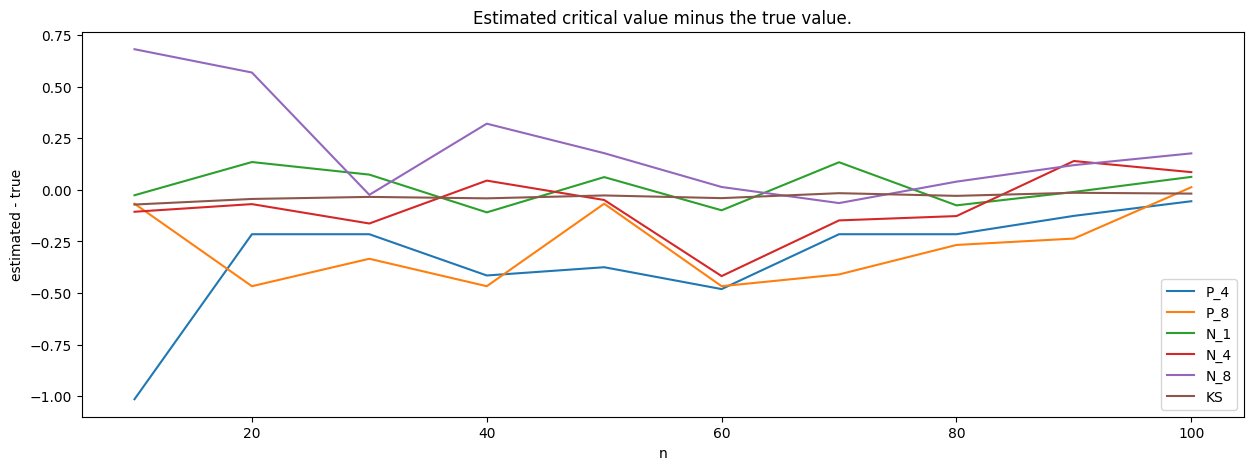

In [95]:
plt.figure(figsize=(15, 5))

plt.plot(ns, [np.round(x - p4_true_cr, 3) for x in p4_crs], label="P_4")
plt.plot(ns, [np.round(x - p8_true_cr, 3) for x in p8_crs], label="P_8")
plt.plot(ns, [np.round(x - n1_true_cr, 3) for x in n1_crs], label="N_1")
plt.plot(ns, [np.round(x - n4_true_cr, 3) for x in n4_crs], label="N_4")
plt.plot(ns, [np.round(x - n8_true_cr, 3) for x in n8_crs], label="N_8")
plt.plot(ns, [np.round(x - k_true_cr, 3) for x in k_crs], label="KS")
plt.title('Estimated critical value minus the true value.')
plt.xlabel("n")
plt.ylabel("estimated - true")
plt.legend()

## Task 2
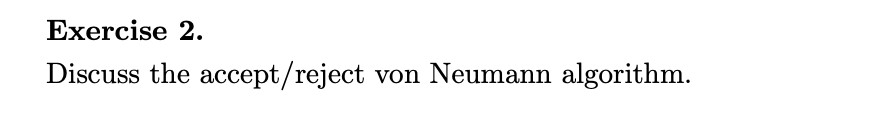

* https://docs.scipy.org/doc/scipy/tutorial/stats/sampling.html
* https://stats.stackexchange.com/questions/530062/von-neumann-acceptance-rejection-technique-for-2-or-more-variables
* https://rh8liuqy.github.io/Accept_reject.html
* http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-ARM.pdf

## Task 3
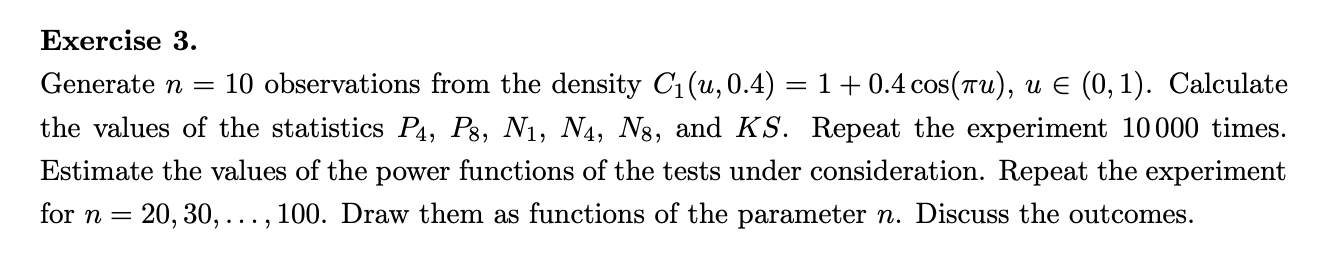

In [35]:
from scipy.stats.sampling import TransformedDensityRejection, SimpleRatioUniforms

class C_distribution:

    def pdf(self, x: float) -> float:
        return 1 + 0.4 * np.cos(np.pi * x)

    def dpdf(self, x: float) -> float:
        return -0.4 * np.sin(np.pi * x)

    def support(self) -> Tuple[int, int]:
        return (0, 1)

c_dist = C_distribution()
urng = np.random.default_rng()
c_dist_gen = SimpleRatioUniforms(c_dist, domain=(0, 1), random_state=urng)

C:\Users\Febrin\AppData\Local\Temp\ipykernel_14848\1990843407.py:16: RuntimeWarning: [objid: SROU] 22 : mode: try finding it (numerically) => (distribution) incomplete distribution object, entry missing
  c_dist_gen = SimpleRatioUniforms(c_dist, domain=(0, 1), random_state=urng)


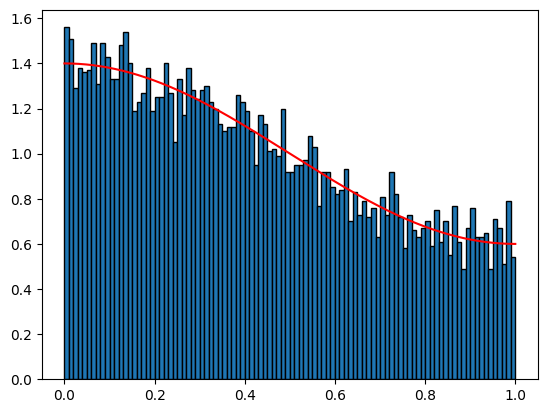

In [36]:
_ = plt.hist(c_dist_gen.rvs(10000), bins=100, density=True, edgecolor="black")
plt.plot(
    np.linspace(0, 1, 1000),
    c_dist.pdf(np.linspace(0, 1, 1000)),
    color="red"
)

In [80]:
%%time

ns, p4_crs, p8_crs, k_crs, n1_crs, n4_crs, n8_crs = [], [], [], [], [], [], []
for n in tqdm(range(10, 110, 10)):
    p4s, p8s, n1s, n4s, n8s, kes = [], [], [], [], [], []
    for _ in tqdm(range(10000)):
        X = c_dist_gen.rvs(n)
        p4 = pearson(k=4, X=X)
        p8 = pearson(k=8, X=X)
        n1 = neyman(k=1, X=X)
        n4 = neyman(k=4, X=X)
        n8 = neyman(k=8, X=X)
        k = ks(X=X)
        p4s.append(p4)
        p8s.append(p8)
        n1s.append(n1)
        n4s.append(n4)
        n8s.append(n8)
        kes.append(k)

    ns.append(n)
    p4_crs.append(sum([x > p4_true_cr for x in p4s]) / 10000)
    p8_crs.append(sum([x > p8_true_cr for x in p8s]) / 10000)
    n1_crs.append(sum([x > n1_true_cr for x in n1s]) / 10000)
    n4_crs.append(sum([x > n4_true_cr for x in n4s]) / 10000)
    n8_crs.append(sum([x > n8_true_cr for x in n8s]) / 10000)
    k_crs.append(sum([x > k_true_cr for x in kes]) / 10000)

100%|██████████| 10/10 [16:09<00:00, 96.91s/it] 

CPU times: total: 16min 6s
Wall time: 16min 9s


In [81]:
pd.DataFrame({
    "n": ns,
    "P_4": [np.round(x * 100, 3) for x in p4_crs],
    "P_8": [np.round(x * 100, 3) for x in p8_crs],
    "N_1": [np.round(x * 100, 3) for x in n1_crs],
    "N_4": [np.round(x * 100, 3) for x in n4_crs],
    "N_8": [np.round(x * 100, 3) for x in n8_crs],
    "KS":  [np.round(x * 100, 3) for x in k_crs],
})

,n,P_4,P_8,N_1,N_4,N_8,KS
0,10,4.02,3.77,13.46,8.59,8.51,9.69
1,20,9.36,7.92,23.30,13.32,11.10,18.52
2,30,16.32,11.57,33.23,18.29,14.38,26.91
3,40,21.63,15.70,42.40,25.08,18.46,36.20
4,50,28.99,19.48,50.88,30.66,21.73,44.08
5,60,34.94,25.28,59.40,37.02,27.37,51.79
6,70,42.16,29.65,65.61,43.26,30.93,58.74
7,80,48.08,34.68,72.19,49.61,37.74,65.02
8,90,54.01,40.80,77.26,56.23,43.07,70.70
9,100,59.39,45.52,81.18,60.72,47.49,74.95


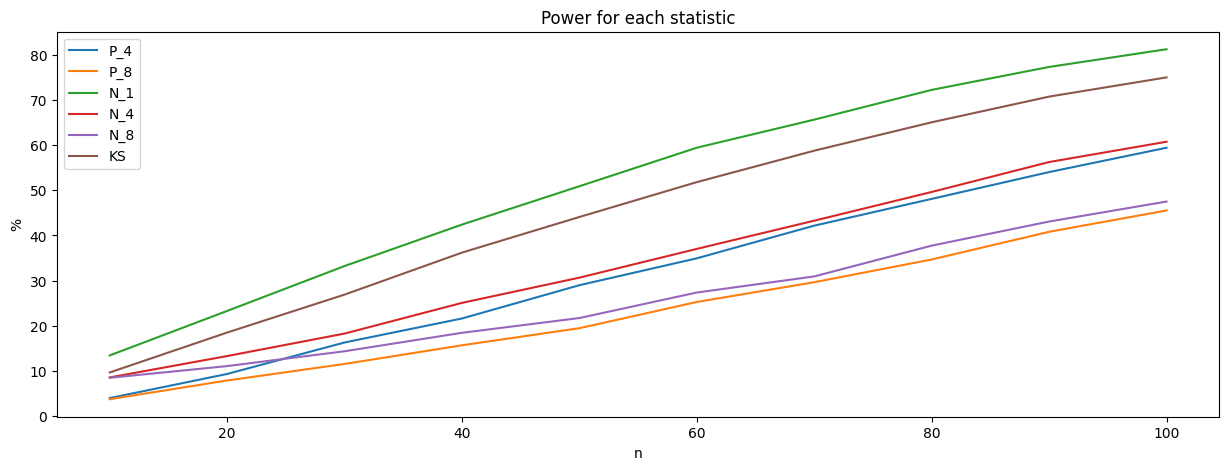

In [86]:
plt.figure(figsize=(15, 5))

plt.plot(ns, [np.round(x * 100, 3) for x in p4_crs], label="P_4")
plt.plot(ns, [np.round(x * 100, 3) for x in p8_crs], label="P_8")
plt.plot(ns, [np.round(x * 100, 3) for x in n1_crs], label="N_1")
plt.plot(ns, [np.round(x * 100, 3) for x in n4_crs], label="N_4")
plt.plot(ns, [np.round(x * 100, 3) for x in n8_crs], label="N_8")
plt.plot(ns, [np.round(x * 100, 3) for x in k_crs], label="KS")
plt.title('Power for each statistic')
plt.xlabel("n")
plt.ylabel("%")
plt.legend()

## Task 4
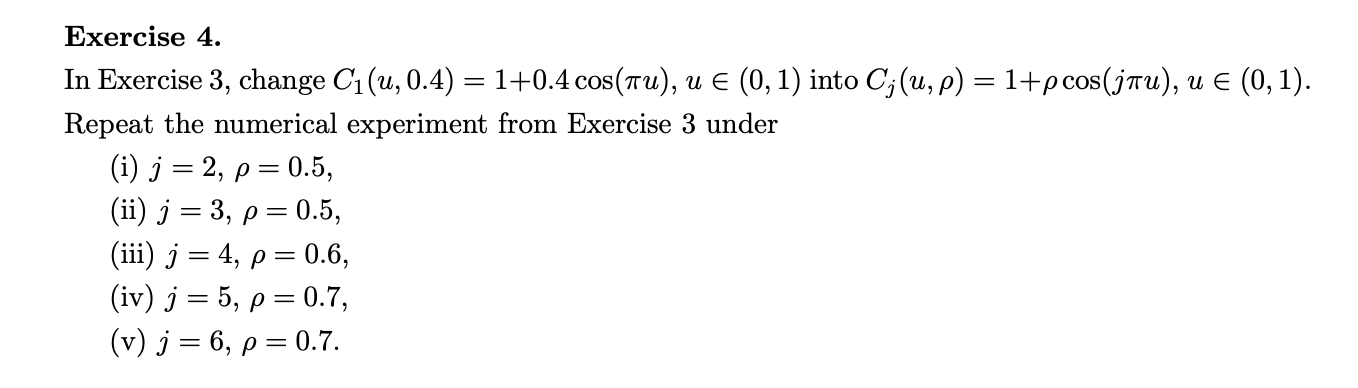

In [96]:
class C_distribution_generic:

    def __init__(self, p, j) -> None:
        self.p = p
        self.j = j

    def pdf(self, x: float) -> float:
        return 1 + self.p * np.cos(np.pi * x * self.j)


    def support(self) -> Tuple[int, int]:
        return (0, 1)


urng = np.random.default_rng()

C:\Users\Febrin\AppData\Local\Temp\ipykernel_14848\3557851730.py:11: RuntimeWarning: [objid: SROU] 22 : mode: try finding it (numerically) => (distribution) incomplete distribution object, entry missing
  c_dist_gen = SimpleRatioUniforms(c_dist, domain=(0, 1), random_state=urng)


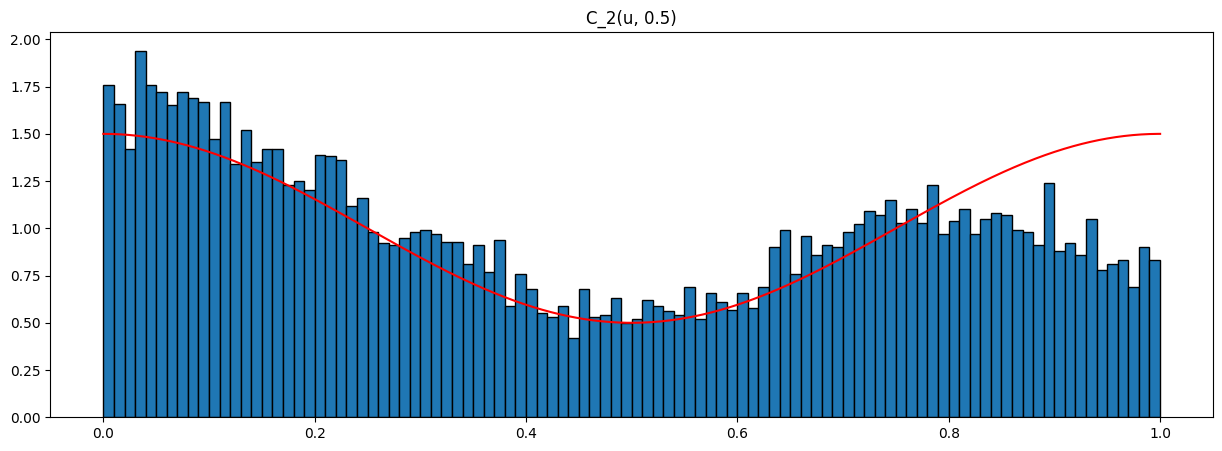

100%|██████████| 10/10 [01:39<00:00,  9.90s/it]


     n   P_4   P_8   N_1   N_4   N_8    KS
0   10  10.2   8.5   9.8  12.9  11.3   9.0
1   20  18.5  17.0  14.4  21.1  18.1  14.8
2   30  27.2  21.8  15.2  25.8  21.7  19.3
3   40  32.4  25.2  21.8  32.2  28.1  27.5
4   50  40.6  32.3  25.3  42.8  35.3  34.0
5   60  47.8  42.2  29.7  51.7  41.3  39.9
6   70  56.1  49.7  33.0  60.1  50.7  46.1
7   80  60.3  52.8  36.8  65.7  54.4  52.3
8   90  67.4  61.0  40.9  73.6  63.3  59.5
9  100  69.6  66.3  43.9  75.1  66.8  62.2


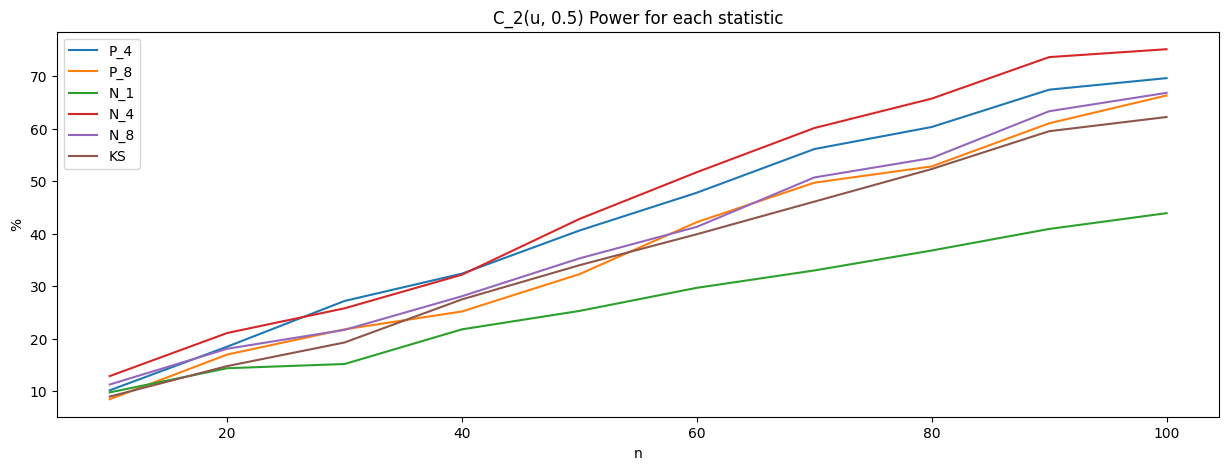

C:\Users\Febrin\AppData\Local\Temp\ipykernel_14848\3557851730.py:11: RuntimeWarning: [objid: SROU] 22 : mode: try finding it (numerically) => (distribution) incomplete distribution object, entry missing
  c_dist_gen = SimpleRatioUniforms(c_dist, domain=(0, 1), random_state=urng)


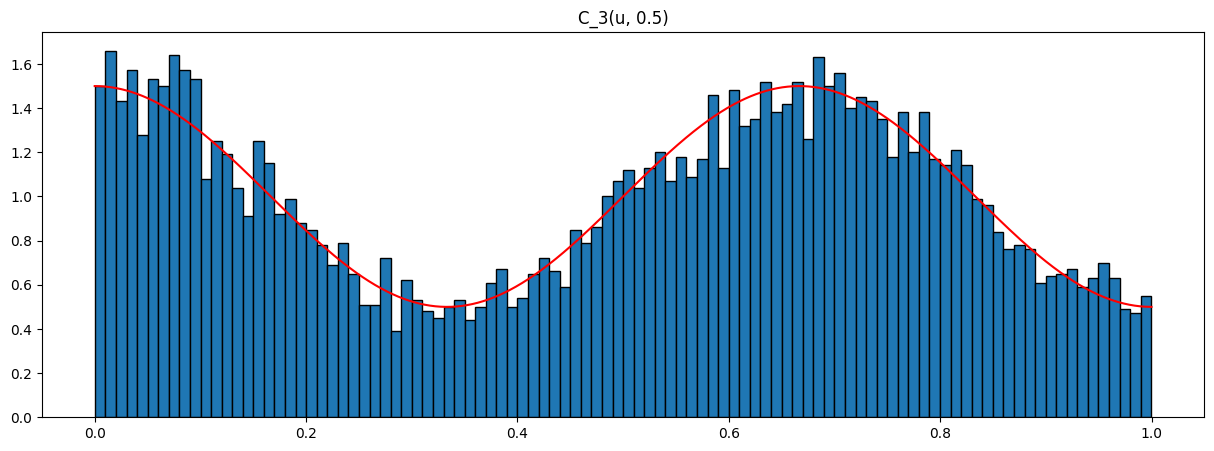

100%|██████████| 10/10 [01:37<00:00,  9.77s/it]


     n   P_4   P_8  N_1   N_4   N_8    KS
0   10   5.6   4.8  4.4   8.5   8.4   3.7
1   20  10.1  12.1  5.5  15.4  13.3   4.9
2   30  17.9  16.9  6.9  23.6  22.1   7.9
3   40  21.7  23.2  5.3  30.0  27.5   9.6
4   50  30.3  30.4  5.7  39.2  36.8  10.0
5   60  35.8  36.0  6.4  45.6  42.7  11.9
6   70  41.3  46.2  5.3  53.1  50.8  14.8
7   80  47.6  51.3  6.2  62.2  59.0  17.0
8   90  53.1  57.4  6.3  67.6  64.9  17.4
9  100  58.5  62.0  5.5  71.9  70.5  18.8


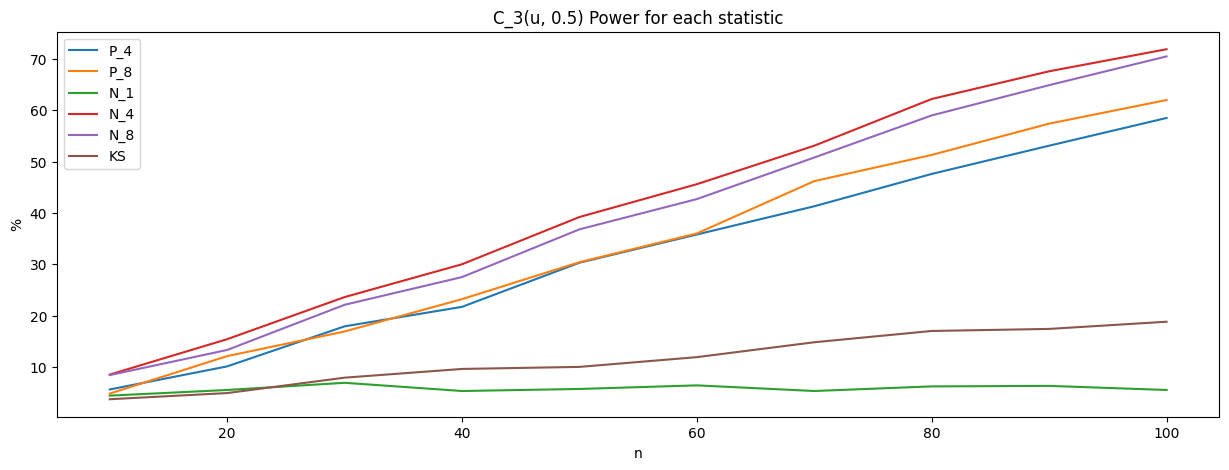

C:\Users\Febrin\AppData\Local\Temp\ipykernel_14848\3557851730.py:11: RuntimeWarning: [objid: SROU] 22 : mode: try finding it (numerically) => (distribution) incomplete distribution object, entry missing
  c_dist_gen = SimpleRatioUniforms(c_dist, domain=(0, 1), random_state=urng)


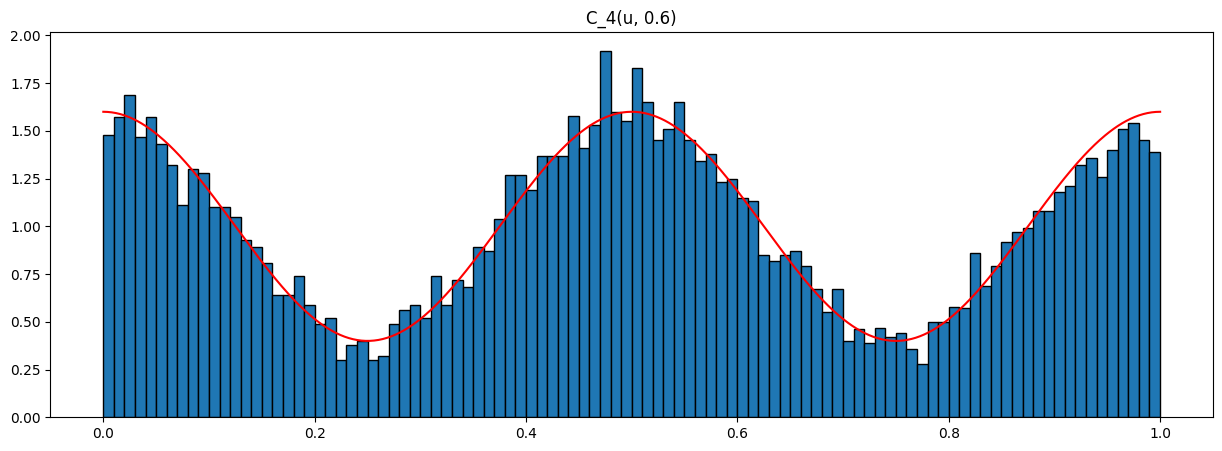

100%|██████████| 10/10 [01:38<00:00,  9.85s/it]


     n  P_4   P_8  N_1   N_4   N_8    KS
0   10  2.3   5.9  5.3  15.8  15.4   2.9
1   20  3.4  20.3  7.8  23.5  26.5   6.3
2   30  5.0  28.6  6.6  33.1  38.4   8.1
3   40  4.3  39.8  5.2  42.9  47.3   9.5
4   50  6.0  48.6  6.8  50.2  58.5  12.7
5   60  4.2  62.5  5.7  58.9  69.5  11.8
6   70  5.7  65.8  5.3  62.7  71.4  13.2
7   80  5.3  71.8  4.2  70.3  80.6  13.7
8   90  5.2  80.6  6.8  75.1  87.5  18.2
9  100  4.7  85.8  6.1  81.0  91.1  19.8


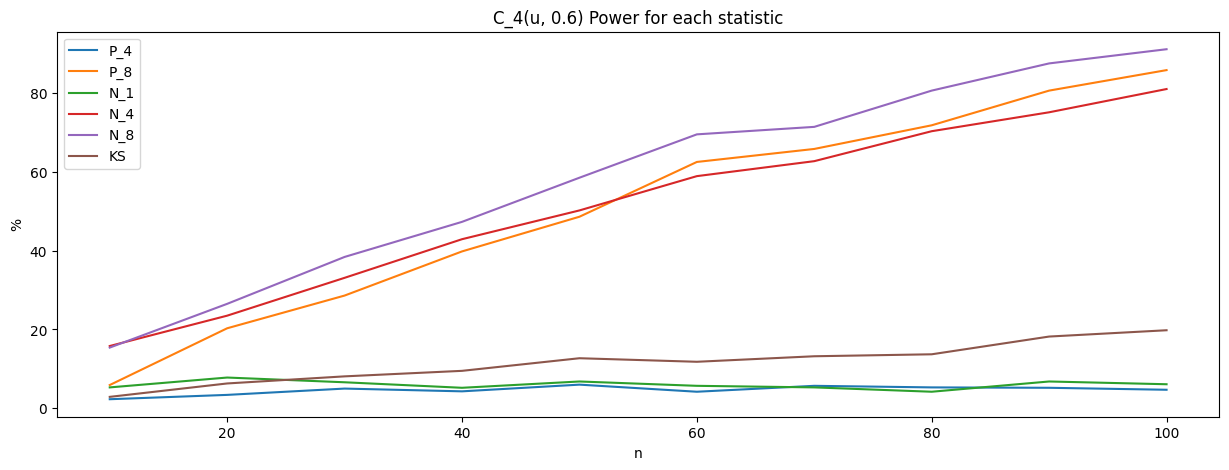

C:\Users\Febrin\AppData\Local\Temp\ipykernel_14848\3557851730.py:11: RuntimeWarning: [objid: SROU] 22 : mode: try finding it (numerically) => (distribution) incomplete distribution object, entry missing
  c_dist_gen = SimpleRatioUniforms(c_dist, domain=(0, 1), random_state=urng)


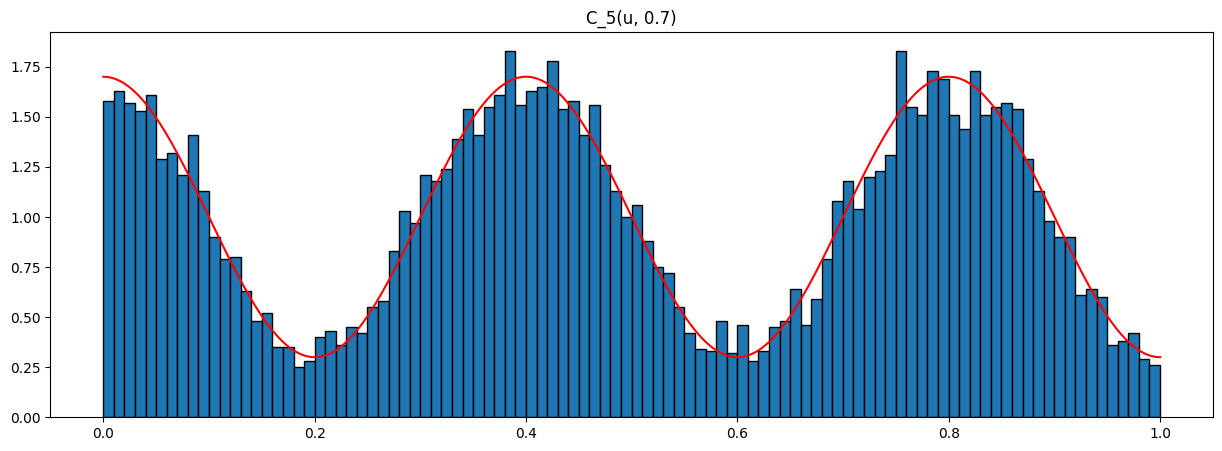

100%|██████████| 10/10 [01:38<00:00,  9.82s/it]


     n   P_4   P_8  N_1   N_4   N_8    KS
0   10   4.3   6.2  4.2   6.9  11.5   3.2
1   20  14.1  18.0  5.2   8.7  25.2   6.5
2   30  21.4  29.0  4.6  11.8  40.3   7.8
3   40  27.6  40.5  5.5  11.6  55.5  10.5
4   50  34.2  50.5  5.3  16.1  68.9  10.9
5   60  36.7  61.9  4.6  15.5  79.4  10.1
6   70  45.0  67.6  5.9  17.3  85.0  14.3
7   80  45.4  76.2  4.6  21.9  92.1  14.8
8   90  52.6  82.2  4.7  21.7  94.3  15.2
9  100  57.0  88.1  5.9  24.7  97.4  21.1


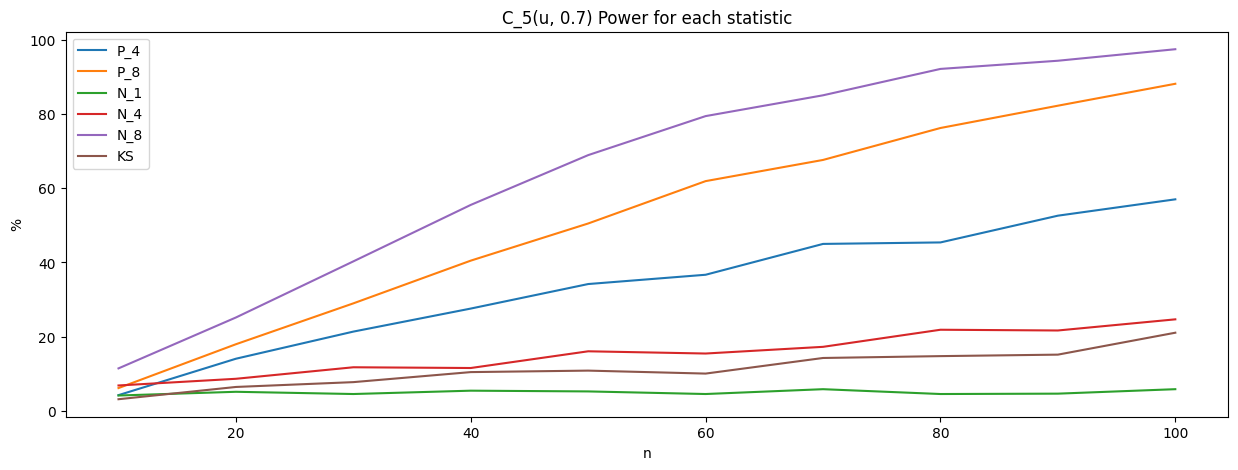

C:\Users\Febrin\AppData\Local\Temp\ipykernel_14848\3557851730.py:11: RuntimeWarning: [objid: SROU] 22 : mode: try finding it (numerically) => (distribution) incomplete distribution object, entry missing
  c_dist_gen = SimpleRatioUniforms(c_dist, domain=(0, 1), random_state=urng)


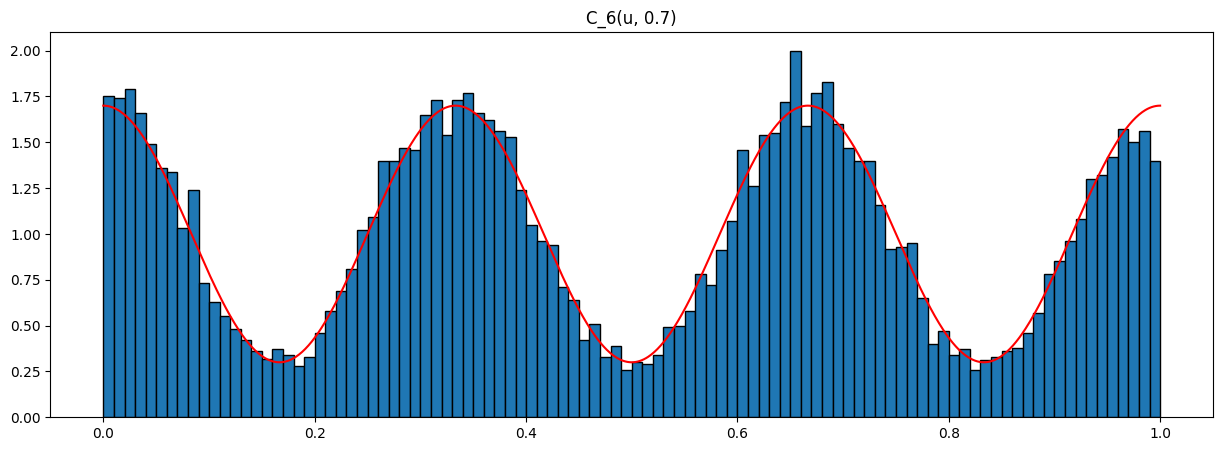

100%|██████████| 10/10 [01:37<00:00,  9.74s/it]


     n   P_4   P_8  N_1   N_4   N_8    KS
0   10   2.1   5.1  4.0  10.8  16.6   3.2
1   20   3.4  12.9  5.6  12.3  29.0   5.1
2   30   6.7  23.7  6.0  15.6  44.6   6.9
3   40   7.1  33.8  5.9  17.8  59.3   6.8
4   50   8.1  44.0  5.5  18.2  69.7   7.4
5   60  10.9  55.6  4.8  20.9  77.9   7.4
6   70  13.4  64.4  4.7  23.7  86.4   8.6
7   80  16.7  75.5  6.1  28.2  93.9  12.5
8   90  17.2  76.8  4.9  28.1  95.3  11.4
9  100  20.7  83.8  4.7  33.8  97.6  12.8


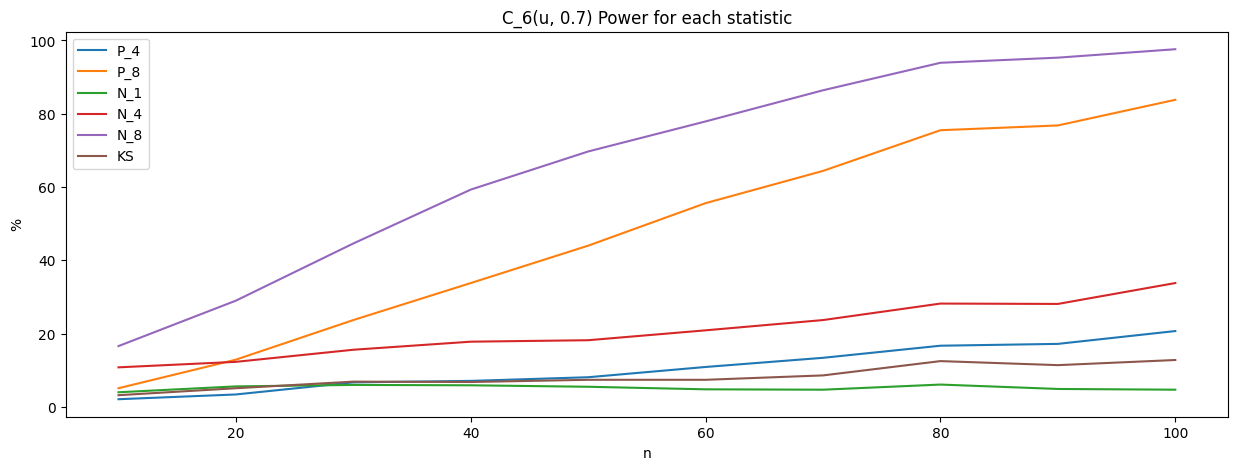

In [106]:
params = [
    (2, 0.5),
    (3, 0.5),
    (4, 0.6),
    (5, 0.7),
    (6, 0.7),
]

for j, p in params:
    c_dist = C_distribution_generic(j=j, p=p)
    c_dist_gen = SimpleRatioUniforms(c_dist, domain=(0, 1), random_state=urng)
    
    plt.figure(figsize=(15, 5))
    _ = plt.hist(c_dist_gen.rvs(10000), bins=100, density=True, edgecolor="black")
    plt.plot(
        np.linspace(0, 1, 1000),
        c_dist.pdf(np.linspace(0, 1, 1000)),
        color="red"
    )
    plt.title(f"C_{j}(u, {p})")
    plt.show()

    ns, p4_crs, p8_crs, k_crs, n1_crs, n4_crs, n8_crs = [], [], [], [], [], [], []
    for n in tqdm(range(10, 110, 10)):
        p4s, p8s, n1s, n4s, n8s, kes = [], [], [], [], [], []
        n_iters = 1000
        for _ in tqdm(range(n_iters)):
            X = c_dist_gen.rvs(n)
            p4 = pearson(k=4, X=X)
            p8 = pearson(k=8, X=X)
            n1 = neyman(k=1, X=X)
            n4 = neyman(k=4, X=X)
            n8 = neyman(k=8, X=X)
            k = ks(X=X)
            p4s.append(p4)
            p8s.append(p8)
            n1s.append(n1)
            n4s.append(n4)
            n8s.append(n8)
            kes.append(k)

        ns.append(n)
        p4_crs.append(sum([x > p4_true_cr for x in p4s]) / n_iters)
        p8_crs.append(sum([x > p8_true_cr for x in p8s]) / n_iters)
        n1_crs.append(sum([x > n1_true_cr for x in n1s]) / n_iters)
        n4_crs.append(sum([x > n4_true_cr for x in n4s]) / n_iters)
        n8_crs.append(sum([x > n8_true_cr for x in n8s]) / n_iters)
        k_crs.append(sum([x > k_true_cr for x in kes]) / n_iters)

    print(
        pd.DataFrame({
            "n": ns,
            "P_4": [np.round(x * 100, 3) for x in p4_crs],
            "P_8": [np.round(x * 100, 3) for x in p8_crs],
            "N_1": [np.round(x * 100, 3) for x in n1_crs],
            "N_4": [np.round(x * 100, 3) for x in n4_crs],
            "N_8": [np.round(x * 100, 3) for x in n8_crs],
            "KS":  [np.round(x * 100, 3) for x in k_crs],
        })
    )
    plt.figure(figsize=(15, 5))
    plt.plot(ns, [np.round(x * 100, 3) for x in p4_crs], label="P_4")
    plt.plot(ns, [np.round(x * 100, 3) for x in p8_crs], label="P_8")
    plt.plot(ns, [np.round(x * 100, 3) for x in n1_crs], label="N_1")
    plt.plot(ns, [np.round(x * 100, 3) for x in n4_crs], label="N_4")
    plt.plot(ns, [np.round(x * 100, 3) for x in n8_crs], label="N_8")
    plt.plot(ns, [np.round(x * 100, 3) for x in k_crs], label="KS")
    plt.title(f"C_{j}(u, {p}) Power for each statistic")
    plt.xlabel("n")
    plt.ylabel("%")
    plt.legend()
    plt.show()
